In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install PaddlePaddle

In [ ]:
!python -m pip install paddlepaddle-gpu -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip install "paddleocr==2.7" # Recommend to use version 2.0.1+

!pip uninstall Pillow
!pip install Pillow==9.5.0

# Install PaddleOCR and VietOCR


In [ ]:

from PIL import Image, ImageOps

from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory

# Install VietOCR
!pip install --quiet vietocr

import matplotlib.pyplot as plt

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

config = Cfg.load_config_from_file('/content/drive/MyDrive/Colab Notebooks/AIprj/config.yml')
#config = Cfg.load_config_from_name('vgg_transformer')

config['weights'] = '/content/drive/MyDrive/Colab Notebooks/AIprj/weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'
detector = Predictor(config)


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:10<00:00, 366kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:12<00:00, 798kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:12<00:00, 172kiB/s]

[2024/01/04 09:28:34] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 80.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
paddleocr 2.7.0.0 requires Pillow>=10.0.0, but you have pillow 9.5.0 which is incompatible.


# Create temporary output

In [ ]:
import os
import shutil

temp_output = '/content/temp_output.txt'
# Create output text file
with open(temp_output, 'w'):
    pass
print(f"output.txt file created at: {temp_output}")
# Output folder
os.makedirs('/content/OUTPUT', exist_ok=True)

output.txt file created at: /content/temp_output.txt


In [ ]:
import re
def capitalize_first_letter(match):
    # Capitalize the first letter of each word
    return ' '.join(word.capitalize() for word in match.split())
def post_processing(filepath, infor):

    with open(filepath, 'r', encoding='utf-8') as file:
            content = file.read()
            keywords = ["REPUBLIC","SOCIALIST","Independence","Freedom","Happiness","Citizen","Identity","Card","Full","name","Date","Sex","expiry"]
            found_keywords = [kw for kw in keywords if kw in content]
            if found_keywords:
                new(filepath, infor)
            else:
                old(filepath, infor)
def old(filepath, infor):
    # Find ID
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
        for line in file:
            # Using regular expression to find sequences of digits with length >= 8
            digit_sequences = re.findall(r'\b\d{9,}\b', line)
            # Save found sequences to the external variable
            infor.extend(digit_sequences)
    # Find name
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()
        # Using regular expression to find "tên:" and the following line
        matches = re.findall(r'tên:?\s*([^\n\r]+)', content, re.IGNORECASE | re.DOTALL)
        # Remove leading and trailing whitespaces from each match
        infor.extend(match.upper().strip() for match in matches)
    # Find DOB
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()

        # Find all date patterns (dd/mm/yyyy or dd-mm-yyyy)
        date_patterns = re.findall(r'\b\d{2}/\d{2}/\d{4}\b|\b\d{2}-\d{2}-\d{4}\b', content)

        # Append all found date patterns to the list
        infor.extend(date_patterns)
    # Find gender
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()

    # Find all occurrences of "Nam" or "Nữ" after the first date pattern
    gender_matches = re.findall(r'(?<=\b\d{2}/\d{2}/\d{4}\b|\b\d{2}-\d{2}-\d{4}\b)[\s\n]*.*?\b(Nam|Nữ)\b', content)

    if gender_matches:
        # Take the first occurrence as the result
        gender_found = gender_matches[0]
        infor.append(gender_found)

    # Find quoc tich
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()
        # Using regular expression to find "quốc tịch:" and the following line
        quoc_tich_matches = re.findall(r'quốc tịch:?\s*([^\n\r]+)', content, re.IGNORECASE | re.DOTALL)
        # Capitalize the first letter of each word and remove leading and trailing whitespaces
        formatted_quoc_tich = ' '.join(capitalize_first_letter(match) for match in quoc_tich_matches)
        infor.append(formatted_quoc_tich)
    # Find quê quán
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()
        # Using regular expression to find "quê quán:" and everything until the word 'nơi'
        que_quan_matches = re.findall(r'quê quán:?\s*(.*?)\s*nơi', content, re.IGNORECASE | re.DOTALL)
        formatted_que_quan = que_quan_matches[0].replace('\n', ', ').strip()
        infor.extend([formatted_que_quan])
    # Find nơi thường trú
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()
        # Using regular expression to find
        matches = re.findall(r'thường trú:?\s*(.*?)\s*có', content, re.IGNORECASE | re.DOTALL)
        formatted = matches[0].replace('\n', ', ').strip()
        infor.extend([formatted])
def new(filepath,infor):
    # Find ID
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
        for line in file:
            # Using regular expression to find sequences of digits with length >= 9
            digit_sequences = re.findall(r'\b\d{9,}\b', line)

            # Save found sequences to the external variable
            infor.extend(digit_sequences)
    # Find name
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()
        # Using regular expression to find "Họ và tên:" and the following line
        matches = re.findall(r'name:?\s*([^\n\r]+)', content, re.IGNORECASE | re.DOTALL)
        # Remove leading and trailing whitespaces from each match
        infor.extend(match.upper().strip() for match in matches)
    # Find DOB
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()

        # Find all date patterns (dd/mm/yyyy or dd-mm-yyyy)
        date_patterns = re.findall(r'\b\d{2}/\d{2}/\d{4}\b|\b\d{2}-\d{2}-\d{4}\b', content)

        # Append all found date patterns to the list
        infor.extend(date_patterns)
    # Find gender
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()

    # Find all occurrences of "Nam" or "Nữ" after the first date pattern
    gender_matches = re.findall(r'(?<=\b\d{2}/\d{2}/\d{4}\b|\b\d{2}-\d{2}-\d{4}\b)[\s\n]*.*?\b(Nam|Nữ)\b', content)

    if gender_matches:
        # Take the first occurrence as the result
        gender_found = gender_matches[0]
        infor.append(gender_found)

    # Find quoc tich
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()
        # Using regular expression to find "quốc tịch:" and the following line
        quoc_tich_matches = re.findall(r'ality:?\s*([^\n\r]+)', content, re.IGNORECASE | re.DOTALL)
        # Capitalize the first letter of each word and remove leading and trailing whitespaces
        formatted_quoc_tich = ' '.join(capitalize_first_letter(match) for match in quoc_tich_matches)
        infor.append(formatted_quoc_tich)
    # Find quê quán
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()
        # Using regular expression to find "quê quán:" and everything until the word 'nơi'
        que_quan_matches = re.findall(r'origin:?\s*(.*?)\s*nơi', content, re.IGNORECASE | re.DOTALL)
        formatted_que_quan = que_quan_matches[0].replace('\n', ' ').strip()
        infor.append(formatted_que_quan)
    # Find nơi thường trú
    with open(filepath, 'r', encoding='utf-8', errors='ignore') as file:
        content = file.read()
        residence = ''
        # Using regular expression to find
        matches = re.findall(r'residence:?\s*(.*)', content, re.IGNORECASE | re.DOTALL)
        if matches:
            lines = [line.strip() for line in matches[0].split('\n')]
            # Loại các dòng
            keywords = ["Date", "of", "expiry","Có","đến","/20","Không"]
            for line in lines:
                found_keywords = [kw for kw in keywords if kw in line]
                if found_keywords:
                    pass
                else:
                    residence += ', ' + line
        residence = residence.strip(', ')
        infor.append(residence)

# Extracting in a folder

In [ ]:
# Processing...
def cut_images_by_bbox(input_folder, output_folder, padding=5):
    # Process each image file in the input folder
    for filename in os.listdir(input_folder):
        with open(temp_output, 'w') as f:
            pass
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            img_path = os.path.join(input_folder, filename)
            result = ocr.ocr(img_path, cls=True)

            # Draw result
            image = Image.open(img_path).convert('RGB')
            image = ImageOps.exif_transpose(image)
            for idx in range(len(result)):
                res = result[idx]
                boxes = [line[0] for line in res]
                txts = [line[1][0] for line in res]
                scores = [line[1][1] for line in res]
                #im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/drive/MyDrive/Colab Notebooks/AIprj/ARIAL.TTF')

            with open(temp_output, 'a') as f:
                # Save each bounding box as a separate image
                for box, txt, score, box_idx in zip(boxes, txts, scores, range(1, len(boxes) + 1)):
                    # Ensure valid integer coordinates
                    xmin, ymin = map(int, box[0])  # Bottom-left corner
                    xmax, ymax = map(int, box[2])  # Top-right corner
                    # Add padding around the bounding box
                    xmin -= padding
                    ymin -= padding
                    xmax += padding
                    ymax += padding

                    cropped_image = image.crop((xmin, ymin, xmax, ymax))
                    tt_path = '/content/temp.jpg'
                    cropped_image.save(tt_path)
                    img = Image.open(tt_path)
                    prediction = detector.predict(img)
                    # Write to file
                    f.write(prediction + '\n')
            # Remove the file extension
            filename_without_extension, _ = os.path.splitext(filename)

            # Create the new file name without the extension
            new_file_name = f'output_{filename_without_extension}.txt'
            # Save the result output
            # Destination folder in Google Drive
            destination_folder = output_folder
            # Ensure the destination folder exists
            os.makedirs(destination_folder, exist_ok=True)
            # Construct the destination file path in Google Drive
            destination_file_path = os.path.join(destination_folder, new_file_name)
            # Copy the file
            shutil.copy(temp_output, destination_file_path)


# Use
input_folder = '/content/drive/MyDrive/Colab Notebooks/AIprj/cccd_chip/'
output_folder = '/content/drive/MyDrive/Colab Notebooks/AIprj/newtest/'
cut_images_by_bbox(input_folder, output_folder, padding=3)


# Single

[2024/01/04 09:40:28] ppocr DEBUG: dt_boxes num : 22, elapse : 0.06684088706970215
[2024/01/04 09:40:28] ppocr DEBUG: cls num  : 22, elapse : 0.04420137405395508
[2024/01/04 09:40:28] ppocr DEBUG: rec_res num  : 22, elapse : 0.12306523323059082


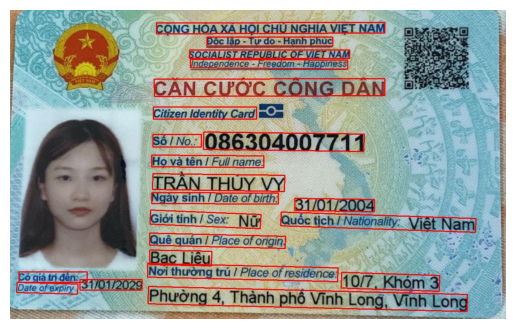

086304007711
TRẦN THÚY VY
31/01/2004
31/01/2029
Nữ
Việt Nam
Bạc Liêu
10/7. Khám 3, Phường 4, Thành phố Vĩnh Long, Vĩnh Long


In [ ]:
import numpy as np
import cv2
import re
infor_extracted = []
# Processing...
def modified_draw_ocr(image, boxes):
    box_num = len(boxes)
    for i in range(box_num):
        box = np.reshape(np.array(boxes[i]), [-1, 1, 2]).astype(np.int64)
        image = cv2.polylines(np.array(image), [box], True, (255, 0, 0), 2)
    return image
def cut_images_by_bbox(filepath, padding=5):
        filename = os.path.basename(filepath)
        with open(temp_output, 'w') as f:
            pass
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            result = ocr.ocr(filepath, cls=True)

            # Draw result
            image = Image.open(filepath).convert('RGB')
            image = ImageOps.exif_transpose(image)
            for idx in range(len(result)):
                res = result[idx]
                boxes = [line[0] for line in res]
                im_show = modified_draw_ocr(image, boxes)
                im_show = Image.fromarray(im_show)
                im_show.save('detect.jpg')
                imm = Image.open('detect.jpg')
                plt.imshow(imm)
                plt.axis('off')
                plt.show()

            with open(temp_output, 'a') as f:
                # Save each bounding box as a separate image
                for box, box_idx in zip(boxes, range(1, len(boxes) + 1)):
                    # Ensure valid integer coordinates
                    x0, y0 = map(int, box[0])  # Bottom-left corner
                    x2, y2 = map(int, box[2])  # Top-right corner
                    x1, y1 = map(int, box[1])
                    x3, y3 = map(int, box[3])
                    xmin=min(x0,x1,x2,x3)
                    xmax=max(x0,x1,x2,x3)
                    ymin=min(y0,y1,y2,y3)
                    ymax=max(y0,y1,y2,y3)
                    # Add padding around the bounding box
                    xmin -= padding
                    ymin -= padding
                    xmax += padding
                    ymax += padding

                    cropped_image = image.crop((xmin, ymin, xmax, ymax))
                    tt_path = '/content/temp.jpg'
                    cropped_image.save(tt_path)
                    img = Image.open(tt_path)
                    prediction = detector.predict(img)
                    #print(prediction)
                    # Write to file
                    f.write(prediction + '\n')

# Usage
filepath = '/content/drive/MyDrive/Colab Notebooks/AIprj/testset/full/n125.png'
cut_images_by_bbox(filepath, padding=3)
post_processing(temp_output,infor_extracted)
for item in infor_extracted:
    print(item)
